In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv').values

In [14]:
train_row = 5000

X_train = train.values[0: train_row, 1:] #Origin_X_train
y_train = train.values[0: train_row, 0]  #Origin_y_train

In [15]:
test.shape

(28000, 784)

In [7]:
pred = pd.read_csv('test.csv').values  #Origin_X_test

In [20]:
print(X_train.shape, y_train.shape)
print(pred.shape)

(5000, 784) (5000,)
(28000, 784)


4


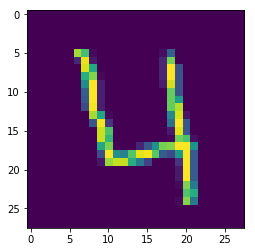

In [22]:
row = 3
print(y_train[row])

plt.imshow(X_train[row].reshape((28, 28)))
plt.show()

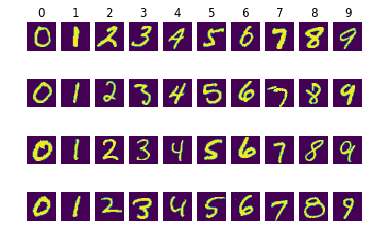

In [25]:
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
rows = 4

for y, cls in enumerate(classes):
    idxs = np.nonzero([i == y for i in y_train])
    idxs = np.random.choice(idxs[0], rows)
    for i, idx in enumerate(idxs):
        plt_idx = i * len(classes) + y + 1
        plt.subplot(rows, len(classes), plt_idx)
        plt.imshow(X_train[idx].reshape((28, 28)))
        plt.axis("off")
        if i == 0:
            plt.title(cls)
            
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train,
                                                     y_train,
                                                     test_size = 0.2,
                                                     random_state = 0)

In [27]:
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(4000, 784) (1000, 784) (4000,) (1000,)


### KNN Model

In [28]:
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

optimal_k = 0
k_range = range(1, 10)
scores = []

## searching for the optimal k-value
for k in k_range:
    print("k = " + str(k) + " begin ")
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    scores.append(accuracy)
    end = time.time()
    print(classification_report(y_valid, y_pred))
    print(confusion_matrix(y_valid, y_pred))
    print("Complete Time: " + str(end - start) + "seconds.")

k = 1 begin 
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       103
          1       0.90      0.98      0.94       100
          2       0.97      0.88      0.92       104
          3       0.89      0.93      0.91       100
          4       0.93      0.93      0.93       107
          5       0.95      0.88      0.92        94
          6       0.93      0.97      0.95        93
          7       0.92      0.94      0.93       116
          8       0.89      0.85      0.87        85
          9       0.85      0.85      0.85        98

avg / total       0.92      0.92      0.92      1000

[[101   0   0   1   0   0   1   0   0   0]
 [  0  98   0   1   0   0   0   0   0   1]
 [  0   1  91   2   2   0   1   2   3   2]
 [  0   0   1  93   0   1   0   1   3   1]
 [  0   0   0   0  99   0   1   0   0   7]
 [  0   2   1   3   0  83   3   0   2   0]
 [  1   1   0   0   0   0  90   0   1   0]
 [  0   4   0   0   1   0   0 109   0   2]
 [  

             precision    recall  f1-score   support

          0       0.95      0.98      0.97       103
          1       0.82      0.98      0.89       100
          2       0.98      0.88      0.92       104
          3       0.93      0.91      0.92       100
          4       0.93      0.93      0.93       107
          5       0.91      0.89      0.90        94
          6       0.88      0.98      0.93        93
          7       0.89      0.87      0.88       116
          8       0.96      0.79      0.86        85
          9       0.83      0.83      0.83        98

avg / total       0.91      0.90      0.90      1000

[[101   0   0   0   0   0   2   0   0   0]
 [  0  98   0   0   0   0   1   0   0   1]
 [  0   4  91   1   0   0   0   4   2   2]
 [  0   0   1  91   0   2   1   2   1   2]
 [  0   0   0   0  99   0   1   0   0   7]
 [  0   3   0   1   0  84   6   0   0   0]
 [  1   0   0   0   0   1  91   0   0   0]
 [  0  10   0   0   2   0   0 101   0   3]
 [  2   3   0   4

In [29]:
print(scores)

[0.919, 0.906, 0.92, 0.915, 0.915, 0.914, 0.915, 0.909, 0.904]


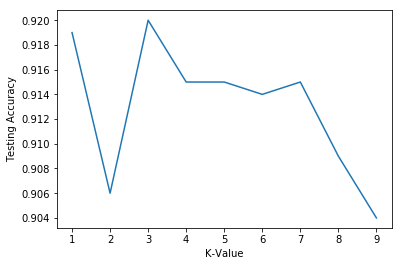

In [30]:
plt.plot(k_range, scores)
plt.xlabel('K-Value')
plt.ylabel('Testing Accuracy')
plt.show()

In [32]:
#optimal k-value = 3
k = 3

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)
y_pred = knn.predict(pred[:300])

1


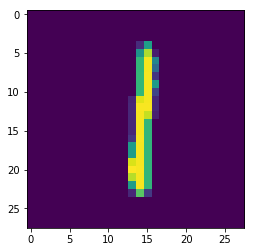

In [36]:
print(y_pred[200])
plt.imshow(pred[200].reshape((28, 28)))
plt.show()